# Анализ экономических показателей разных стран

Нужно изучить информацию о разных странах. В ней есть данные о ВВП, инфляции, безработице и росте экономики в разные годы.

Есть датасет, включающий экономические показатели и информацию об инфляции для некторых стран мира, такие как валовой внутренний продукт (ВВП), уровень инфляции, уровень безработицы и экономический рост с 2010 по 2025 год (есть исторические данные за период с 2010 по 2023 год и прогнозы на 2024 и 2025 годы). Данные представлены в виде таблицы, в которой указаны следующие столбцы:

- `Страна` — название государства, для которого представлены экономические данные.
- `Год` — год, за который представлены данные, с 2010 по 2025 год.
- `ВВП` (в миллиардах долларов США) — общая стоимость всех товаров и услуг, произведённых в стране за определённый год, измеряемая в миллиардах долларов США. Этот показатель отражает размер и состояние экономики.
- `Уровень инфляции` (%) — процентное изменение общего уровня цен на товары и услуги в экономике за год. Инфляция влияет на покупательную способность и экономическую стабильность.
- `Уровень безработицы` (%) — процентное соотношение рабочей силы страны, которая не имеет работы, но активно ищет её. Этот показатель является ключевым индикатором экономического здоровья и эффективности рынка труда.
- `Экономический рост` (%) — годовое процентное изменение ВВП, которое показывает, расширяется или сокращается экономика. Положительный рост свидетельствует о расширении экономики, а отрицательный — о её сокращении.

В датасете данные по таким странам: США, Китай, Индия, Япония, Германия, Франция, Великобритания, Бразилия, Канада, Россия, Австралия, Италия, Южная Корея, Саудовская Аравия, Индонезия, Турция, Малайзия, Пакистан, Бангладеш.

## Цель
Провести анализ, изучить корреляции между такими экономическими показателями, как ВВП, инфляция и безработица. Составить прогноз и выявить тенденции экономического роста, составить прогноз на будущее на основе исторических данных.

## Настройка среды и загрузка данных¶

In [1]:
# Подавление предупреждений
import warnings
warnings.filterwarnings('ignore')

# Импорт необходимых библиотек
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.inspection import permutation_importance

# Установка бэкэнда для matplotlib (полезно для неинтерактивных сред)
plt.switch_backend('Agg')

# Включение построчного черчения для Jupyter Notebook
%matplotlib inline

# Установка стиля
sns.set_theme(style='whitegrid')

In [2]:
# Получаем данные
data_path = 'economic_indicators_inflation.csv'
df = pd.read_csv(data_path, encoding='ascii', delimiter=',')

In [3]:
# Функция получения полной информации о датафрейме
def data_info (data):
    print('\033[1m' + 'Первые 10 строк:' + '\033[0m')
    display(data.head(10))
    print('-------------')
    print('\033[1m' + 'Последние 10 строк:' + '\033[0m')
    display(data.tail(10))
    print('-------------')
    print('\033[1m' + 'Типы данных:' + '\033[0m')
    display(data.info(memory_usage='deep'))
    print('-------------')
    print('\033[1m' + 'Полное статистическое описание:' + '\033[0m')
    display(data.describe(include = "all"))
    print('-------------')
    print('\033[1m' + 'Категориальные признаки:' + '\033[0m')
    display(data.describe(include=[object]))
    print('-------------')
    print('\033[1m' + 'Пропуски:' + '\033[0m')
    # Обход всех столбцов и проверка наличия пропущенных значений
    for i in data.columns:
        if data[i].isna().sum() > 0:
            print(f"Столбец {i} имеет {data[i].isna().sum()} пропусков\n")
        else:
            print(f"В столбце {i} пропусков НЕТ\n")
    print('-------------')
    print('\033[1m' + 'Доля пропусков от всех данных:' + '\033[0m')
    display(data.isna().mean().sort_values(ascending=False)*100)
    print('-------------')
    print('\033[1m' + 'Явные дубликаты:' + '\033[0m')
    if data.duplicated().sum() > 0:
        print('Дубликатов: ', data.duplicated().sum())
    else:
        print('Явных дублей НЕТ')

data_info(df)

Первые 10 строк:


,Country,Year,GDP (in billion USD),Inflation Rate (%),Unemployment Rate (%),Economic Growth (%)
0,USA,2010,15000.0,1.64,9.63,2.55
1,USA,2011,15500.0,3.16,8.94,1.53
2,USA,2012,16000.0,2.07,8.10,2.28
3,USA,2013,16500.0,1.50,7.70,1.84
4,USA,2014,17000.0,1.62,7.25,2.53
5,USA,2015,17500.0,0.12,5.32,3.08
6,USA,2016,18000.0,1.26,4.87,2.69
7,USA,2017,18500.0,2.13,4.30,2.81
8,USA,2018,19000.0,2.44,3.91,2.90
9,USA,2019,19500.0,1.81,3.70,2.33


-------------
Последние 10 строк:


,Country,Year,GDP (in billion USD),Inflation Rate (%),Unemployment Rate (%),Economic Growth (%)
294,Pakistan,2016,278.0,3.8,5.0,5.4
295,Pakistan,2017,314.0,4.0,5.0,5.4
296,Pakistan,2018,314.0,3.9,5.0,5.5
297,Pakistan,2019,314.0,6.8,5.0,3.3
298,Pakistan,2020,263.0,10.7,5.0,-0.5
299,Pakistan,2021,296.0,8.9,5.0,5.7
300,Pakistan,2022,350.0,12.3,5.0,6.0
301,Pakistan,2023,400.0,20.0,5.0,4.0
302,Pakistan,2024,450.0,25.0,5.0,3.0
303,Pakistan,2025,500.0,20.0,5.0,3.2


-------------
Типы данных:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 304 entries, 0 to 303
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Country                 304 non-null    object 
 1    Year                   304 non-null    int64  
 2    GDP (in billion USD)   304 non-null    float64
 3    Inflation Rate (%)     304 non-null    float64
 4    Unemployment Rate (%)  304 non-null    float64
 5    Economic Growth (%)    304 non-null    float64
dtypes: float64(4), int64(1), object(1)
memory usage: 28.6 KB


None

-------------
Полное статистическое описание:


,Country,Year,GDP (in billion USD),Inflation Rate (%),Unemployment Rate (%),Economic Growth (%)
count,304,304.000000,304.000000,304.000000,304.000000,304.000000
unique,19,NaN,NaN,NaN,NaN,NaN
top,USA,NaN,NaN,NaN,NaN,NaN
freq,16,NaN,NaN,NaN,NaN,NaN
mean,NaN,2017.500000,3383.430921,4.807105,6.257467,3.060428
std,NaN,4.617373,4283.442479,7.261215,2.609952,3.308527
min,NaN,2010.000000,105.000000,-1.200000,2.100000,-14.000000
25%,NaN,2013.750000,1114.250000,1.700000,4.500000,1.600000
50%,NaN,2017.500000,2006.500000,3.300000,5.500000,2.900000
75%,NaN,2021.250000,3625.000000,5.500000,7.850000,5.125000


-------------
Категориальные признаки:


,Country
count,304
unique,19
top,USA
freq,16


-------------
Пропуски:
В столбце Country пропусков НЕТ

В столбце  Year пропусков НЕТ

В столбце  GDP (in billion USD) пропусков НЕТ

В столбце  Inflation Rate (%) пропусков НЕТ

В столбце  Unemployment Rate (%) пропусков НЕТ

В столбце  Economic Growth (%) пропусков НЕТ

-------------
Доля пропусков от всех данных:


Country                   0.0
 Year                     0.0
 GDP (in billion USD)     0.0
 Inflation Rate (%)       0.0
 Unemployment Rate (%)    0.0
 Economic Growth (%)      0.0
dtype: float64

-------------
Явные дубликаты:
Явных дублей НЕТ


В датасете нет пропусков и явных дублей. Столбец "Год" содержит информацию типа даты, хотя имеет формат целого числа (менять тип данных и формат не будем). В названиях столбцов есть лишние пробелы в начале, переименуем их. Кроме того, формат данных в столбцах с показателями изменим с float64 на float32 для экономии памяти.

## Предобработка данных¶

In [4]:
def rename_columns(data):
    """
    Переименовывает столбцы:
    - Переводит к нижнему регистру.
    - Убирает пробелы в начале и в конце.
    - Убирает скобки.
    - Заменяет пробелы внутри названий на символ подчёркивания.
    
    :param df: Исходный датафрейм.
    :return: датафрейм с переименованными столбцами.
    """
    # Функция для обработки одного названия столбца
    def clean_column_name(col_name):
        # Переводим к нижнему регистру
        col_name = col_name.lower()
        # Убираем пробелы в начале и в конце
        col_name = col_name.strip()
        # Убираем скобки
        col_name = col_name.replace('(', '').replace(')', '')
        # Заменяем пробелы на подчёркивания
        col_name = col_name.replace(' ', '_')
        return col_name
    
    # Применяем функцию ко всем названиям столбцов
    data.columns = [clean_column_name(col) for col in data.columns]
    return data

# Используем
df = rename_columns(df)
print("\nНовые названия столбцов:")
df.columns.tolist()


Новые названия столбцов:


['country',
 'year',
 'gdp_in_billion_usd',
 'inflation_rate_%',
 'unemployment_rate_%',
 'economic_growth_%']

In [5]:
# Преобразуем столбец 'year' в формат даты (только год)
#df['year'] = pd.to_datetime(df['year'], format='%Y').dt.year
#df['year'] = pd.to_datetime(df['year'], format='%Y')
df['year'] = df['year'].astype('float32')
# Преобразуем столбцы с показателями в float32
df['gdp_in_billion_usd'] = df['gdp_in_billion_usd'].astype('float32')
df['inflation_rate_%'] = df['inflation_rate_%'].astype('float32')
df['unemployment_rate_%'] = df['unemployment_rate_%'].astype('float32')
df['economic_growth_%'] = df['economic_growth_%'].astype('float32')

print('\033[1m' + 'Новые типы данных:' + '\033[0m')
display(df.info(memory_usage='deep'))

print('\033[1m' + 'Первые строки:' + '\033[0m')
display(df.head())

Новые типы данных:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 304 entries, 0 to 303
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   country              304 non-null    object 
 1   year                 304 non-null    float32
 2   gdp_in_billion_usd   304 non-null    float32
 3   inflation_rate_%     304 non-null    float32
 4   unemployment_rate_%  304 non-null    float32
 5   economic_growth_%    304 non-null    float32
dtypes: float32(5), object(1)
memory usage: 22.6 KB


None

Первые строки:


,country,year,gdp_in_billion_usd,inflation_rate_%,unemployment_rate_%,economic_growth_%
0,USA,2010.0,15000.0,1.64,9.63,2.55
1,USA,2011.0,15500.0,3.16,8.94,1.53
2,USA,2012.0,16000.0,2.07,8.10,2.28
3,USA,2013.0,16500.0,1.50,7.70,1.84
4,USA,2014.0,17000.0,1.62,7.25,2.53


## Эксплораторный анализ данных
Визуализируем набор данных и узнаем больше о том, как взаимосвязаны эти экономические показатели. Создадим несколько графиков, чтобы получить полное представление о данных.

In [6]:
# Числовые данные для корреляционных и парных графиков
numeric_df = df.select_dtypes(include=[np.number])

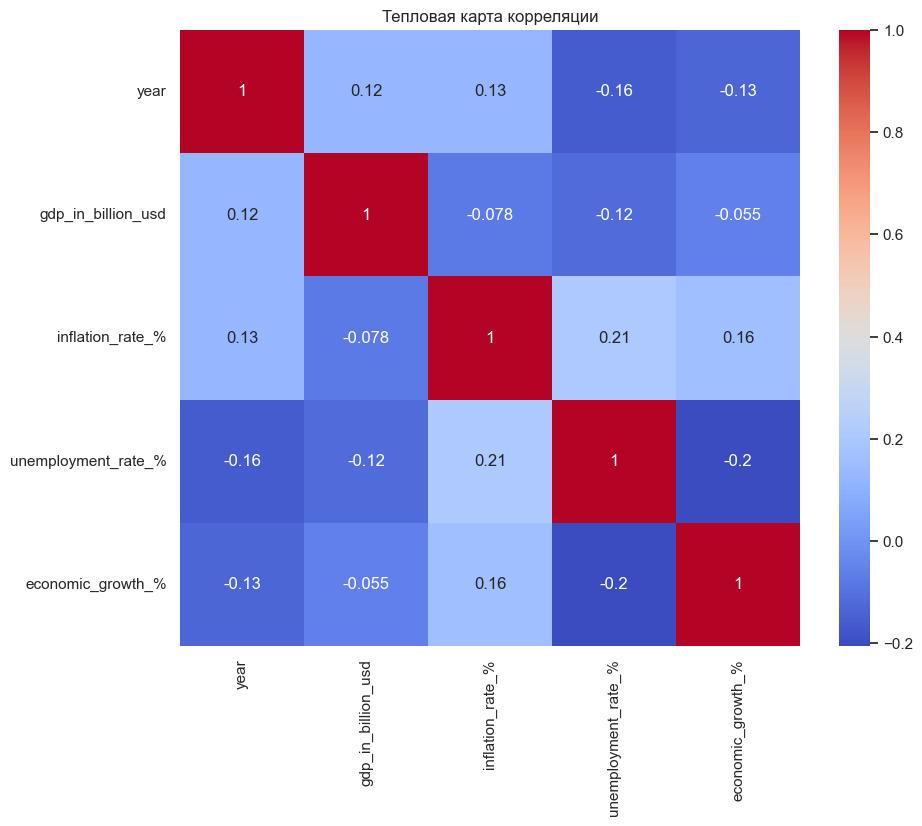

In [7]:
# Тепловая карта корреляции
if numeric_df.shape[1] >= 4:
    plt.figure(figsize=(10, 8))
    corr = numeric_df.corr()
    sns.heatmap(corr, annot=True, cmap='coolwarm')
    plt.title('Тепловая карта корреляции')
    plt.show()

### Анализ тепловой карты корреляции

На данной **тепловой карте корреляции** представлены взаимосвязи между основными экономическими показателями:  
- **GDP (ВВП в млрд $)**
- **Inflation rate (уровень инфляции, %)**
- **Unemployment rate (уровень безработицы, %)**
- **Economic growth (экономический рост, %)**

### Основные наблюдения:

- **Связь между ВВП и другими показателями**  
   - **ВВП ↔ инфляция (-0.078)** – слабая **отрицательная** корреляция, что означает, что рост ВВП незначительно снижает инфляцию, но связь слабая.  
   - **ВВП ↔ безработица (-0.12)** – небольшая **отрицательная** корреляция: при увеличении ВВП уровень безработицы **слегка уменьшается** (что соответствует классической экономической теории).  
   - **ВВП ↔ рост экономики (-0.055)** – почти **нулевая** корреляция, что удивительно. Обычно рост экономики сопровождается ростом ВВП, но здесь связь минимальна.  

- **Связь между инфляцией и безработицей**  
   - **инфляция ↔ безработица (0.21)** – **положительная** корреляция: при увеличении инфляции уровень безработицы **слегка увеличивается**.  
   - Это не совсем соответствует **классической модели Филлипса** (где инфляция и безработица обычно связаны **обратной** зависимостью), что может говорить о специфике данных.  

- **Связь между безработицей и экономическим ростом**  
   - **безработица ↔ рост экономики (-0.2)** – **умеренно отрицательная** корреляция: при росте экономики уровень безработицы **снижается**.  
   - Это **логично**, так как при увеличении экономического роста появляются **новые рабочие места**, что уменьшает безработицу.  

- **Связь между инфляцией и экономическим ростом**  
   - **инфляция ↔ рост экономики (0.16)** – **слабая положительная** корреляция: при росте инфляции экономика **слегка ускоряется**.  
   - Это может быть связано с тем, что небольшая инфляция стимулирует потребление и инвестиции.  

### Выводы:

- **Рост ВВП слабо влияет на безработицу и инфляцию, что может говорить о структурных проблемах экономики или особенностях данных.**  
- **Экономический рост ожидаемо снижает безработицу, но связь не слишком сильная.**  
- **Инфляция и безработица растут вместе, что нетипично – стоит проанализировать, нет ли здесь эффектов кризиса или стагфляции.**  
- **Данные могут зависеть от страны/региона – стоит проверить зависимость для разных экономик отдельно.**  

**Рекомендуемая дополнительная проверка:**
- Посмотреть **корреляции за разные временные периоды** (например, до и после кризисов).
- Анализировать **развитые и развивающиеся страны отдельно** – часто корреляции у них разные.
- Проверить **нелинейные зависимости** – возможно, в данных есть скрытые закономерности.

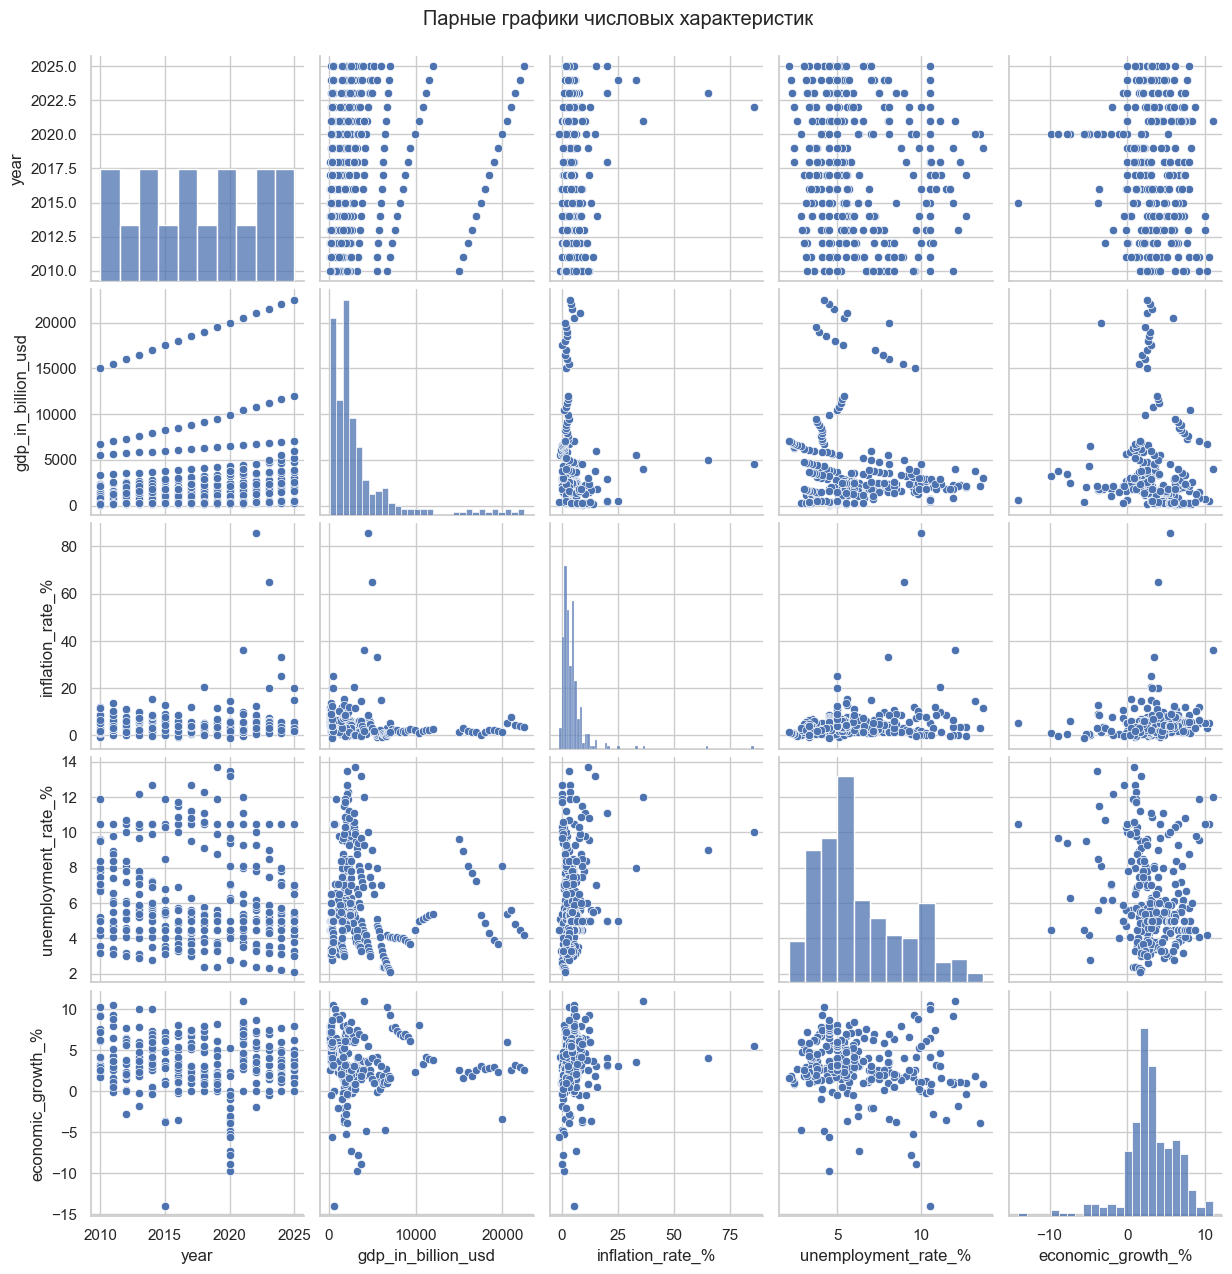

In [8]:
# Парный график
sns.pairplot(numeric_df.dropna())
plt.suptitle('Парные графики числовых характеристик', y=1.02)
plt.show()

### Анализ парного графика числовых характеристик

Этот парный график визуализирует взаимосвязь между четырьмя экономическими показателями:  

- **ВВП (валовой внутренний продукт) в млрд долларов**  
- **Инфляция (%)**  
- **Уровень безработицы (%)**  
- **Экономический рост (%)**  

#### Основные наблюдения:  

1. **Распределение данных**  
   - GDP имеет **асимметричное распределение** с высокой концентрацией на малых значениях. Это означает, что большинство стран в выборке имеют относительно низкий ВВП, но есть несколько стран с очень высоким ВВП (вероятно, США, Китай и другие ведущие экономики).  
   - Инфляция и экономический рост имеют **разбросанные распределения**, с несколькими экстремальными значениями (возможно, гиперинфляция или кризисные годы).  
   - Уровень безработицы имеет **скошенное распределение** с пиком в районе 5–6%.  

2. **Связь между переменными**  
   - **ВВП и уровень безработицы**: Наблюдается **обратная зависимость** – страны с более высоким ВВП обычно имеют более низкий уровень безработицы. Это согласуется с экономической теорией.  
   - **ВВП и экономический рост**: Здесь четкой связи не прослеживается – страны с высоким ВВП могут иметь как положительный, так и отрицательный рост.  
   - **Инфляция и экономический рост**: Не наблюдается четкой зависимости, но экстремально высокая инфляция, как правило, сопровождается нестабильным экономическим ростом.  
   - **Безработица и экономический рост**: Можно увидеть тенденцию, что высокий уровень безработицы часто сопровождается низкими или отрицательными темпами роста экономики.  

3. **Выбросы и экстремальные значения**  
   - В данных по инфляции есть выбросы (значения выше 50%), что может указывать на гиперинфляционные периоды в некоторых странах.  
   - В экономическом росте также есть экстремальные значения в районе **-10% и 10%**, что может свидетельствовать о сильных кризисах или экономических подъемах.  

### Выводы:
- Экономическая политика должна учитывать связь между ВВП и безработицей – стимулирование роста ВВП может помочь сократить уровень безработицы.  
- Высокая инфляция негативно влияет на экономический рост, поэтому центральные банки должны контролировать монетарную политику.  
- Необходимо провести более глубокий анализ стран с экстремальными значениями (очень высокий/низкий экономический рост и инфляция) для выявления факторов, влияющих на нестабильность.

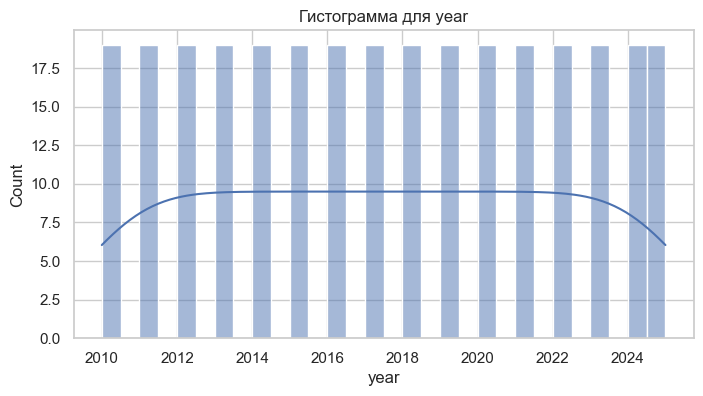

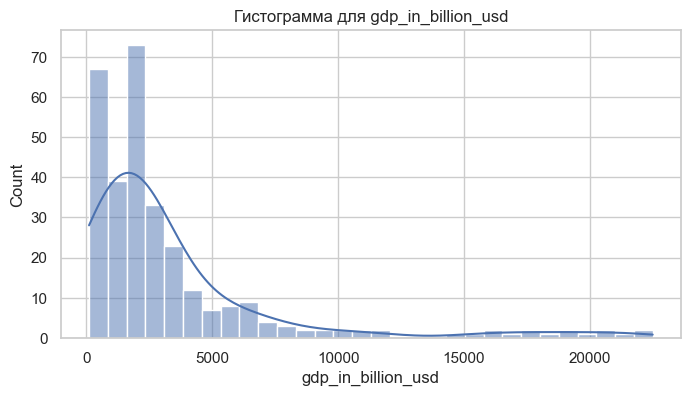

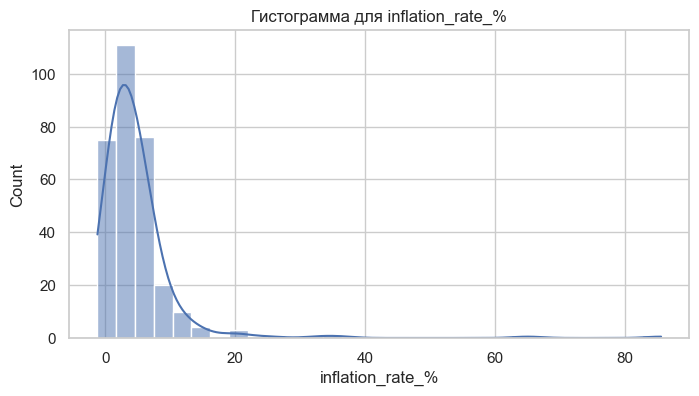

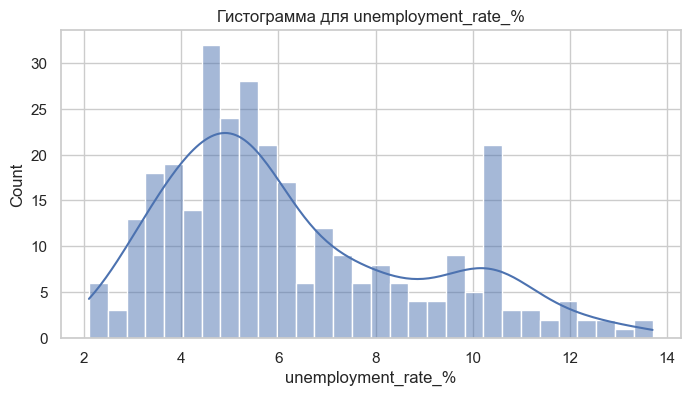

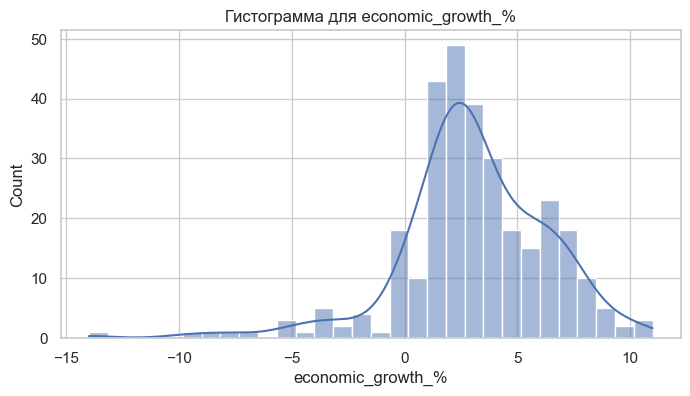

In [9]:
# Гистограммы для числовых столбцов
numeric_columns = numeric_df.columns
for col in numeric_columns:
    plt.figure(figsize=(8, 4))
    sns.histplot(numeric_df[col].dropna(), kde=True, bins=30)
    plt.title(f'Гистограмма для {col}')
    plt.show()

### Анализ гистограмм экономических показателей  

На изображении представлены **гистограммы** распределения четырех ключевых экономических показателей:  

1. **ВВП (GDP) в миллиардах долларов**  
2. **Инфляция (%)**  
3. **Уровень безработицы (%)**  
4. **Экономический рост (%)**  

#### Основные наблюдения:

- **Гистограмма для GDP (ВВП в млрд долларов)**  
   - **Распределение сильно смещено влево** (правосторонняя асимметрия).  
   - Большинство стран имеют относительно **низкий ВВП** (до 5000 млрд долларов), но есть небольшое количество стран с **очень высоким ВВП** (>15 000 млрд долларов).  
   - Вероятно, это отражает разницу между развитыми и развивающимися странами.  

- **Гистограмма для инфляции (%)**  
   - **Распределение экспоненциальное** – большинство наблюдений сосредоточено в диапазоне **0–10%**, но есть несколько выбросов (инфляция выше 50–80%).  
   - Пик распределения приходится на **низкие значения инфляции** (от 0% до 5%), что говорит о том, что в большинстве стран инфляция остается на стабильном уровне.  
   - Однако присутствуют экстремальные значения, указывающие на периоды **гиперинфляции** или экономических кризисов.  

- **Гистограмма для уровня безработицы (%)**  
   - **Близко к нормальному распределению**, но имеет небольшую асимметрию.  
   - Основная масса данных находится в диапазоне **4–8%**.  
   - Есть всплеск в районе **10%**, что может свидетельствовать о группах стран, переживающих экономические трудности.  

- **Гистограмма для экономического роста (%)**  
   - **Близкое к нормальному распределение**, центрированное вокруг **0–3%**.  
   - Основная масса данных находится в диапазоне от **-2% до 6%**.  
   - Небольшое количество стран демонстрируют **резкий экономический спад (до -15%)** или **очень высокий рост (до 10%)**, что может быть связано с кризисами или резкими подъемами экономики.  

### Выводы и рекомендации:  
- **Большинство стран имеют умеренный уровень инфляции (0–10%) и экономический рост (0–5%), что говорит о стабильности мировой экономики.**  
- **Высокий ВВП характерен для небольшого числа стран, что подтверждает глобальное неравенство в уровне экономического развития.**  
- **Экономические кризисы выражаются в экстремальных значениях инфляции (>50%) и отрицательного роста (< -10%).**  

Рекомендуется провести дополнительный анализ стран с аномальными значениями, чтобы выявить факторы нестабильности.

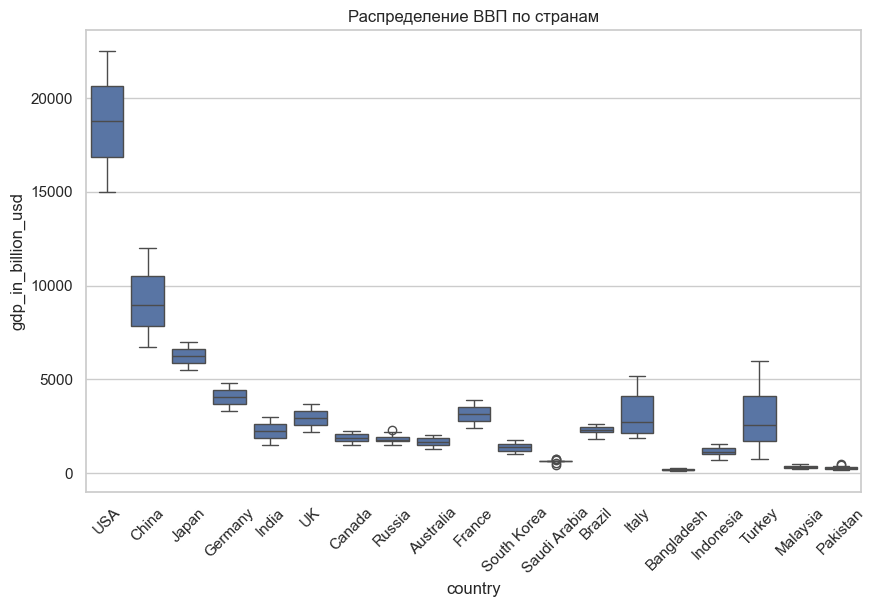

In [10]:
# Выбросы для экономических показателей по странам
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='country', y='gdp_in_billion_usd')
plt.title('Распределение ВВП по странам')
plt.xticks(rotation=45)
plt.show()

### Анализ распределения ВВП по странам (boxplot)

На графике представлен **график ВВП по странам**, который визуализирует **распределение данных, медиану, разброс и выбросы**.

### Основные наблюдения:

- **Лидеры по ВВП**  
   - **США** – абсолютный лидер по ВВП, медианное значение превышает 18 000 млрд долларов, а разброс значений довольно велик (от 15 000 более чем до 21 000 млрд долларов).  
   - **Китай** – вторая экономика мира, но с заметным отставанием от США. Медианное значение около 10 000 млрд долларов.  
   - **Япония** и **Германия** – находятся на третьем уровне, их ВВП существенно ниже, но всё ещё превышает 4000–5000 млрд долларов.

- **Средние экономики**  
   - **Индия, Великобритания, Канада, Россия, Франция, Южная Корея** – их медианные значения находятся в пределах **2000–5000 млрд долларов**.
   - Разброс значений относительно небольшой, что говорит о **стабильности экономических показателей** в этих странах.

- **Экономики с большим разбросом**  
   - **Индонезия, Турция, Италия** – у этих стран наблюдается **широкий межквартильный размах**, что указывает на **экономическую волатильность** (сильные колебания ВВП).  
   - Например, у Индонезии и Турции значительное отличие между квартилями и наличие выбросов.

- **Страны с низким ВВП**  
   - **Бангладеш, Малайзия, Пакистан** – ВВП на уровнях **менее 1000 млрд долларов**.  
   - Маленький разброс указывает на **стабильные, но сравнительно слабые экономики**.  

### Выводы:

- **Глобальное экономическое неравенство** – США и Китай существенно опережают остальные страны, что подчеркивает их экономическую мощь.  
- **Стабильность ведущих экономик** – страны G7 (США, Япония, Германия, Великобритания, Франция, Канада, Италия) имеют **устойчивые показатели**, без резких колебаний.  
- **Волатильность развивающихся рынков** – Индонезия, Турция и некоторые другие страны демонстрируют **высокую изменчивость ВВП**, что может быть связано с нестабильностью валют, политическими факторами или внешними кризисами.  
- **Развивающимся экономикам** (Бангладеш, Пакистан и др.) требуется **долгосрочное экономическое планирование** для выхода на новый уровень.  

Для более детального анализа можно рассмотреть динамику ВВП по годам и сопоставить с макроэкономическими факторами (инфляция, инвестиции, уровень безработицы).

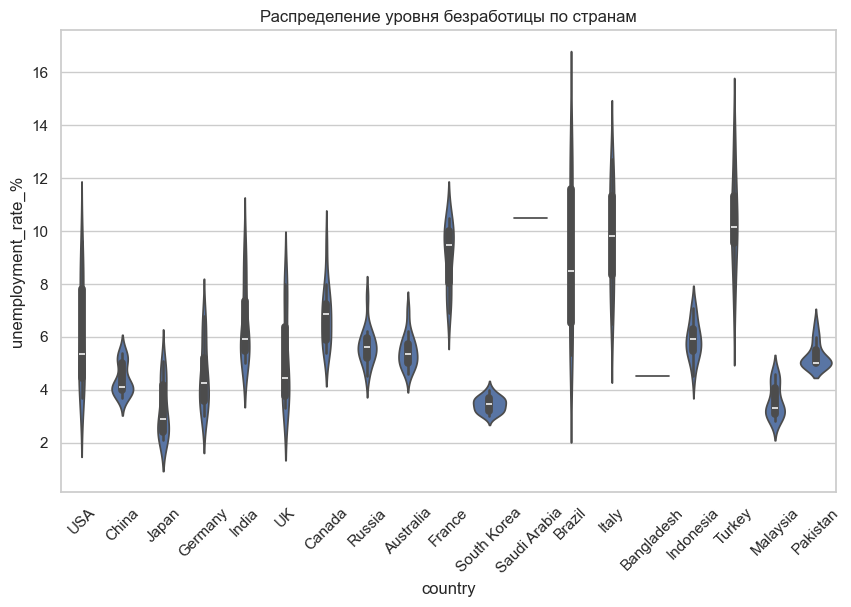

In [11]:
# График уровня безработицы по странам
plt.figure(figsize=(10, 6))
sns.violinplot(data=df, x='country', y='unemployment_rate_%')
plt.title('Распределение уровня безработицы по странам')
plt.xticks(rotation=45)
plt.show()

### Анализ распределения уровня безработицы по странам

На графике представлено **распределение уровня безработицы (%) по разным странам** с использованием **виолин-плота**. Этот тип диаграммы показывает **плотность распределения значений**, медиану (белая точка) и вариативность данных.  

### Основные наблюдения:

- **Страны с низким и стабильным уровнем безработицы**  
   - **Южная Корея, Китай, Малайзия** – уровень безработицы **наиболее стабильный** и находится **в диапазоне 2–4%**.  
   - Это свидетельствует о **хорошем состоянии рынка труда** и низком уровне структурной безработицы.  

- **Страны с умеренной безработицей (4–7%)**  
   - **США, Япония, Германия, Канада, Австралия, Великобритания, Франция, Турция** – медиана безработицы **находится в пределах 4–7%**, но есть **небольшие колебания**.  
   - Эти страны обычно имеют **устойчивые рынки труда**, однако могут сталкиваться с временными кризисами.  

- **Страны с высокой и нестабильной безработицей (>7%)**  
   - **Индия, Россия, Италия, Бразилия, Индонезия, Пакистан** – здесь наблюдаются **значительные колебания** уровня безработицы.  
   - В некоторых случаях значения достигают **10-16%**, что говорит о **периодических экономических проблемах** или нестабильности рынков труда.  

- **Страны с экстремальной изменчивостью**  
   - **Италия и Бразилия** имеют **самый широкий размах распределения**, где безработица варьируется **от 3% до более 16%**.  
   - Это свидетельствует о **сильной экономической нестабильности**, резких кризисах или циклических изменениях на рынке труда.  

### Выводы и рекомендации:  

- **Развитые страны (США, Германия, Япония, Великобритания) показывают умеренный и стабильный уровень безработицы**, что говорит о **надежных системах занятости**.  
- **Южная Корея, Китай, Малайзия – лидеры по стабильности занятости**, что делает их **привлекательными для инвестиций и бизнеса**.  
- **Высокая изменчивость в Италии, Бразилии и ряде развивающихся стран требует анализа причин (экономические кризисы, инфляция, политические факторы).**  
- **Рекомендуется следить за тенденциями в странах с высокой волатильностью**, так как это может повлиять на **инвестиции и экономическую политику**.  

**Дополнительный анализ:**  
Если нужно, можно сравнить эти данные с **темпами экономического роста** и **инфляцией** – это поможет выявить взаимосвязи между безработицей и экономическими циклами.

## Предиктивный анализ¶
На основе этих данных возникает естественный вопрос: можем ли мы предсказать экономический рост страны на основе других экономических показателей? Далее используем линейную регрессионную модель для прогнозирования экономического роста с помощью таких показателей, как ВВП, уровень инфляции, уровень безработицы и год. Подход закладывает основу для более сложного моделирования в будущем. Также вычислен показатель R² для оценки точности прогнозирования и проверена перестановочная значимость признаков.

Коэффициент детерминации (R²) модели линейной регрессии: 0.0761


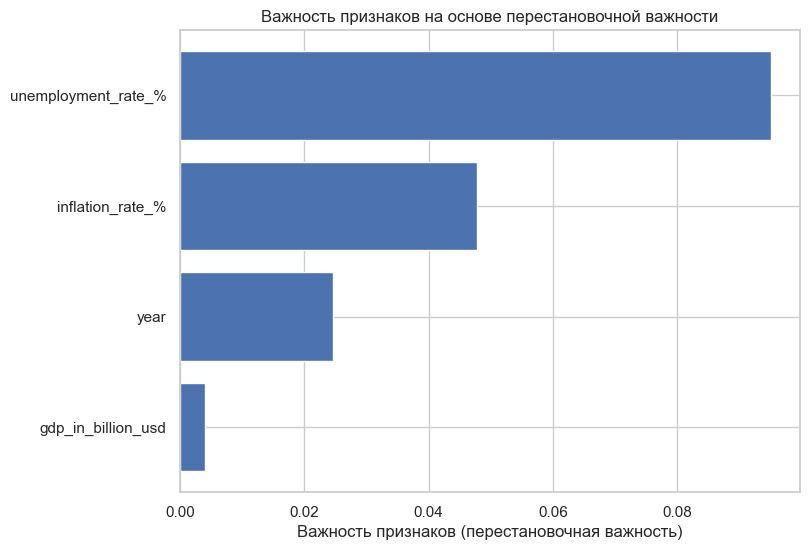

In [ ]:
# Подготовка признаков и целевой переменной
features = df[['gdp_in_billion_usd', 'inflation_rate_%', 'unemployment_rate_%', 'year']]
target = df['economic_growth_%']

# Разделение данных на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Инициализация и обучение модели линейной регрессии
model = LinearRegression()
model.fit(X_train, y_train)

# Прогнозирование на тестовой выборке
y_pred = model.predict(X_test)

# Вычисление и вывод коэффициента детерминации (R²)
r2 = r2_score(y_test, y_pred)
print(f"Коэффициент детерминации (R²) модели линейной регрессии: {r2:.4f}")

# Вычисление важности признаков с помощью перестановочной важности
perm_importance = permutation_importance(model, X_test, y_test, n_repeats=10, random_state=42)
sorted_idx = perm_importance.importances_mean.argsort()

# Визуализация важности признаков
plt.figure(figsize=(8, 6))
plt.barh(features.columns[sorted_idx], perm_importance.importances_mean[sorted_idx])
plt.xlabel('Важность показателей')
plt.title('Важность показателей на основе перестановочной важности')
plt.show()

График показывает важность признаков на основе пермутационной важности - метода, используемого для оценки вклада каждого признака в эффективность модели. Чем выше столбик, тем важнее признак.

Вот что можно сказать об этом графике:
- Уровень безработицы (самая важная характеристика): показатель самый высокий, то есть эта характеристика оказывает самое сильное влияние на прогнозы модели.
- Уровень инфляции (вторая по важности характеристика): второй по высоте показатель, то есть и эта характеристика также является относительно важной.
- Год и ВВП менее важны: показатели "year" и "gdp_in_billion_usd" намного короче, что указывает на слабое влияние этих характеристик на предсказания модели.

Однако коэффициент детерминации (R²) 0,0761 говорит о том, что линейная регрессионная модель объясняет лишь 7,61 % дисперсии целевой переменной. Это указывает на то, что модель не очень хорошо подходит для данных, и характеристики, даже самые важные, могут не быть сильными предикторами.

Таким образом, график показывает, что уровень безработицы и уровень инфляции являются наиболее важными признаками в модели, но низкое значение R² говорит о том, что модель не очень точна. Важно учитывать другие факторы, такие как качество данных и предположения модели, чтобы понять ограничения модели.

## Заключение¶
Изучен набор экономических показателей с помощью различных методов визуализации. Корреляционная тепловая карта и парные графики раскрывают глубинные взаимосвязи между ВВП, инфляцией, безработицей и экономическим ростом. Прогностический анализ с использованием линейной регрессионной модели для прогнозирования экономического роста представляет собой базовый уровень, который может быть доработан с помощью более сложных подходов. В будущем анализ может включать анализ тенденций на уровне стран, альтернативные методы моделирования или даже учёт внешних экономических факторов.